In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:34<00:00, 27.6MB/s]
100% 2.29G/2.29G [01:34<00:00, 26.0MB/s]


In [4]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset='/content/chest-xray-pneumonia.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset has been extracted")

The dataset has been extracted


In [5]:
!ls

chest_xray  chest-xray-pneumonia.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
data_with_pneumonia_files=os.listdir('/content/chest_xray/train/PNEUMONIA')
print(data_with_pneumonia_files[0:5])
print(data_with_pneumonia_files[-5:])

['person25_bacteria_117.jpeg', 'person731_virus_1352.jpeg', 'person152_virus_303.jpeg', 'person1608_bacteria_4235.jpeg', 'person1455_virus_2496.jpeg']
['person1683_bacteria_4460.jpeg', 'person299_bacteria_1416.jpeg', 'person743_bacteria_2646.jpeg', 'person1642_bacteria_4353.jpeg', 'person1687_bacteria_4468.jpeg']


In [8]:
print("Number of Persons with Pneumonia:",len(data_with_pneumonia_files))

Number of Persons with Pneumonia: 3875


In [9]:
data_without_pneumonia_files=os.listdir('/content/chest_xray/train/NORMAL')
print(data_without_pneumonia_files[0:5])
print(data_without_pneumonia_files[-5:])

['IM-0704-0001.jpeg', 'NORMAL2-IM-1094-0001-0002.jpeg', 'IM-0256-0001.jpeg', 'IM-0453-0001.jpeg', 'NORMAL2-IM-1335-0001.jpeg']
['IM-0695-0001.jpeg', 'NORMAL2-IM-0725-0001.jpeg', 'NORMAL2-IM-0954-0001.jpeg', 'NORMAL2-IM-1200-0001.jpeg', 'IM-0404-0001.jpeg']


In [10]:
print("Number of Persons without Pneumonia:",len(data_without_pneumonia_files))

Number of Persons without Pneumonia: 1341


In [11]:
#CREATE THE LABELS

pneumonia_labels=[1]*3875
normal_labels=[0]*1341

In [12]:
print(pneumonia_labels[0:5])
print(normal_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(pneumonia_labels))
print(len(normal_labels))

3875
1341


In [14]:
labels=pneumonia_labels+normal_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

5216
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


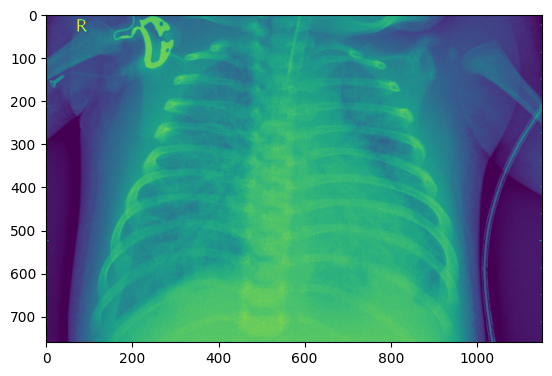

In [15]:
#display pnuemonia image
img=mpimg.imread('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
imgplot=plt.imshow(img)
plt.show()

[[19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 ...
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]]


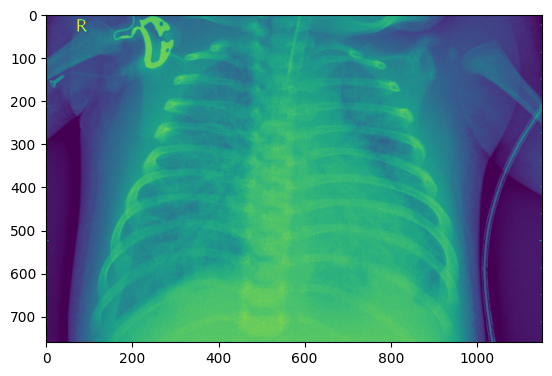

In [16]:
img=mpimg.imread('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
print(img)
imgplot=plt.imshow(img)
plt.show()


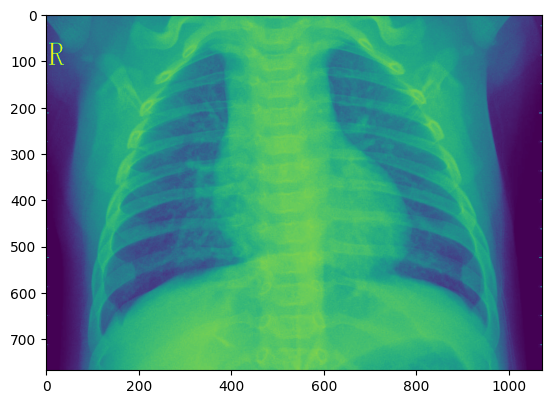

In [17]:
#display pnuemonia image
img=mpimg.imread('/content/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')
imgplot=plt.imshow(img)
plt.show()

[[66 64 62 ... 22 23 24]
 [66 63 61 ... 22 23 23]
 [67 64 61 ... 22 22 23]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


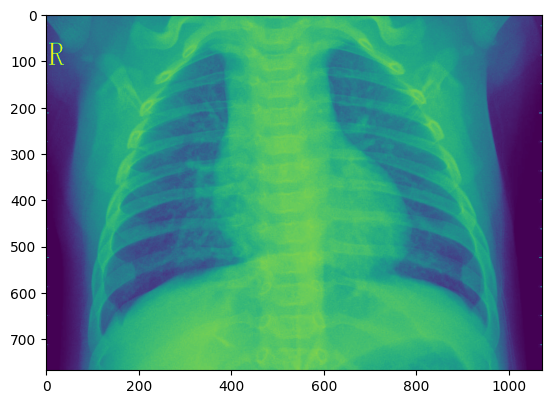

In [18]:
img=mpimg.imread('/content/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')
print(img)
imgplot=plt.imshow(img)
plt.show()

[[50 55 59 ...  1  1  2]
 [52 53 56 ...  4  2  2]
 [49 52 51 ...  4  2  1]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


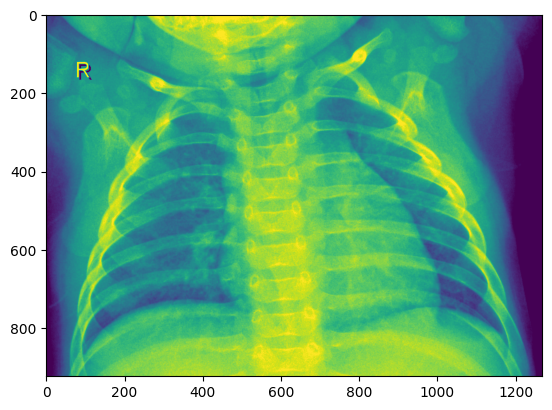

In [19]:
img=mpimg.imread('/content/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg')
print(img)
imgplot=plt.imshow(img)
plt.show()

[[50 55 59 ...  1  1  2]
 [52 53 56 ...  4  2  2]
 [49 52 51 ...  4  2  1]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


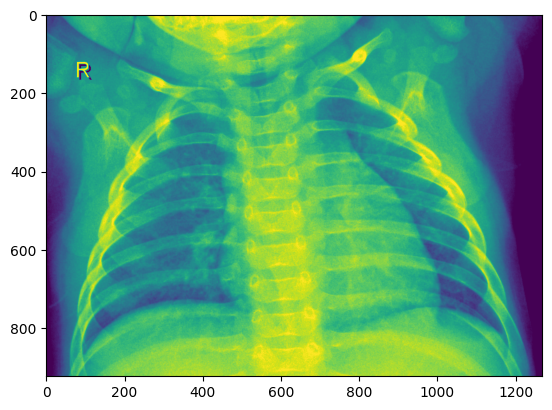

In [20]:
img=mpimg.imread('/content/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg')
print(img)
imgplot=plt.imshow(img)
plt.show()

In [21]:
from PIL import Image
import numpy as np
with_pneumonia_img_path = "/content/chest_xray/train/PNEUMONIA"
data = []
for img_file in data_with_pneumonia_files:
    image = Image.open(with_pneumonia_img_path + "/" + img_file)
    image = image.resize((128, 128))
    image = image.convert('L')
    image = np.array(image)
    data.append(image)
without_pneumonia_img_path = "/content/chest_xray/train/NORMAL"
for img_file in data_without_pneumonia_files:
    image = Image.open(without_pneumonia_img_path + "/" + img_file)
    image = image.resize((128, 128))
    image = image.convert('L')
    image = np.array(image)
    data.append(image)

In [22]:
len(data)

5216

In [23]:
type(data)

list

array([[167, 130,  83, ..., 112, 121, 130],
       [153, 107,  77, ..., 121, 131, 134],
       [130,  78,  66, ..., 126, 131, 136],
       ...,
       [ 20,  20,  20, ...,  20,  20,  20],
       [ 20,  20,  20, ...,  20,  21,  20],
       [ 20,  20,  20, ...,  21,  21,  21]], dtype=uint8)
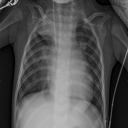

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128)

In [27]:
#converting image list and label list to numpy array
x=np.array(data)
y=np.array(labels)

In [28]:
type(x)

numpy.ndarray

In [29]:
type(y)

numpy.ndarray

In [30]:
print(x.shape)
print(y.shape)

(5216, 128, 128)
(5216,)


In [31]:
print(y)

[1 1 1 ... 0 0 0]


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
print(x.shape,x_train.shape,x_test.shape)

(5216, 128, 128) (4172, 128, 128) (1044, 128, 128)


In [34]:
#scaling the data(previously we have 0 to 255 now we have to scale all the values between 0 and 1)
x_train_scaled=x_train/255

x_test_scaled=x_test/255

array([[  8,   8,   8, ..., 153, 137, 118],
       [ 10,   8,   8, ..., 151, 135, 117],
       [  9,   8,   8, ..., 151, 134, 113],
       ...,
       [  9,   6,   6, ...,   7,   7,  10],
       [  7,   6,   6, ...,   7,   7,   8],
       [  6,   6,   6, ...,   6,   6,   7]], dtype=uint8)
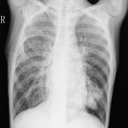

In [35]:
x_train[0]

In [36]:
x_train_scaled[0]

array([[0.03137255, 0.03137255, 0.03137255, ..., 0.6       , 0.5372549 ,
        0.4627451 ],
       [0.03921569, 0.03137255, 0.03137255, ..., 0.59215686, 0.52941176,
        0.45882353],
       [0.03529412, 0.03137255, 0.03137255, ..., 0.59215686, 0.5254902 ,
        0.44313725],
       ...,
       [0.03529412, 0.02352941, 0.02352941, ..., 0.02745098, 0.02745098,
        0.03921569],
       [0.02745098, 0.02352941, 0.02352941, ..., 0.02745098, 0.02745098,
        0.03137255],
       [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02745098]])

In [37]:
x_train_scaled.shape

(4172, 128, 128)

In [38]:
x_train_scaled = np.expand_dims(x_train_scaled, axis=-1)
print(x_train_scaled.shape)

(4172, 128, 128, 1)


In [39]:
x_test_scaled = np.expand_dims(x_test_scaled, axis=-1)
print(x_test_scaled.shape)

(1044, 128, 128, 1)


In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
#To reduce the model from getting thre risk of overfitting we use the below line
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64,activation='relu'))
#To reduce the model from getting thre risk of overfitting we use the below line
model.add(keras.layers.Dropout(0.5))


#Output layer
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [42]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=15)

Epoch 1/15
118/118 [==============================] - 96s 802ms/step - loss: 0.3894 - acc: 0.8242 - val_loss: 0.1623 - val_acc: 0.9474
Epoch 2/15
118/118 [==============================] - 93s 789ms/step - loss: 0.1663 - acc: 0.9395 - val_loss: 0.0942 - val_acc: 0.9641
Epoch 3/15
118/118 [==============================] - 96s 816ms/step - loss: 0.1331 - acc: 0.9507 - val_loss: 0.0827 - val_acc: 0.9665
Epoch 4/15
118/118 [==============================] - 93s 787ms/step - loss: 0.1134 - acc: 0.9595 - val_loss: 0.0697 - val_acc: 0.9737
Epoch 5/15
118/118 [==============================] - 100s 853ms/step - loss: 0.0996 - acc: 0.9622 - val_loss: 0.0757 - val_acc: 0.9689
Epoch 6/15
118/118 [==============================] - 93s 792ms/step - loss: 0.0863 - acc: 0.9702 - val_loss: 0.0666 - val_acc: 0.9761
Epoch 7/15
118/118 [==============================] - 93s 792ms/step - loss: 0.0768 - acc: 0.9734 - val_loss: 0.0614 - val_acc: 0.9737
Epoch 8/15
118/118 [==============================] - 

In [44]:
pip install keras matplotlib pydot

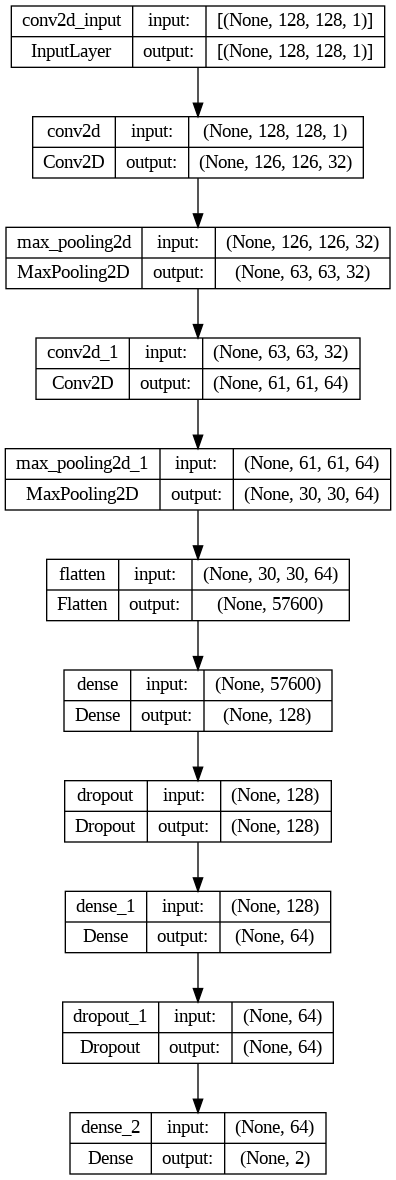

In [45]:
from keras.utils import plot_model
# Save a visualization of the neural network architecture
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

In [46]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print("Test accuracy",accuracy*100)

33/33 [==============================] - 7s 199ms/step - loss: 0.0971 - acc: 0.9703
Test accuracy 97.03065156936646


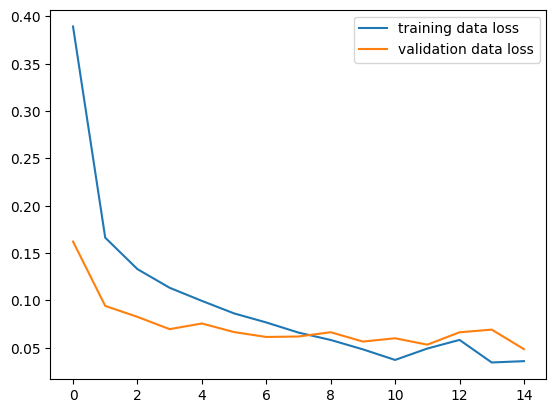

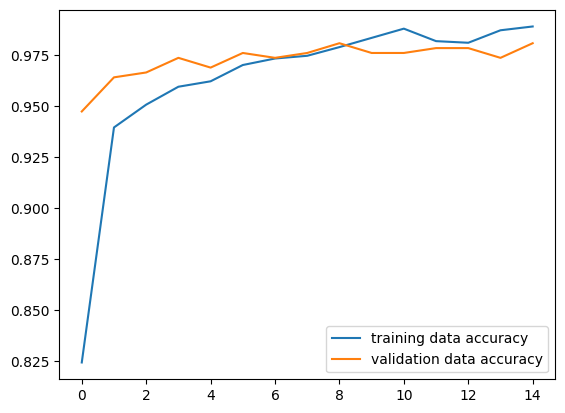

In [47]:
h=history

#plot the loss values

plt.plot(h.history['loss'],label='training data loss')
plt.plot(h.history['val_loss'],label='validation data loss')
plt.legend()
plt.show()

#plot the accuracy values

plt.plot(h.history['acc'],label='training data accuracy')
plt.plot(h.history['val_acc'],label='validation data accuracy')
plt.legend()
plt.show()

In [48]:
y_pred_prob = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)  # For multi-class classification



33/33 [==============================] - 8s 241ms/step


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')        # Same as above
f1 = f1_score(y_test, y_pred, average='binary')                # Same as above



In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       267
           1       0.98      0.98      0.98       777

    accuracy                           0.97      1044
   macro avg       0.96      0.97      0.96      1044
weighted avg       0.97      0.97      0.97      1044



Confusion Matrix:


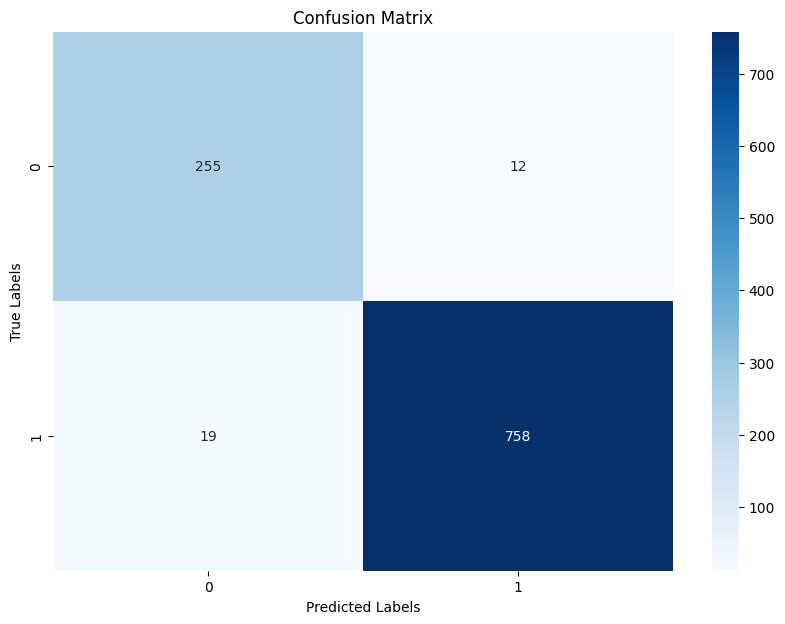

In [51]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [52]:
model.save('NagoorPneumonia1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Path of the image to be predicted:/content/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg


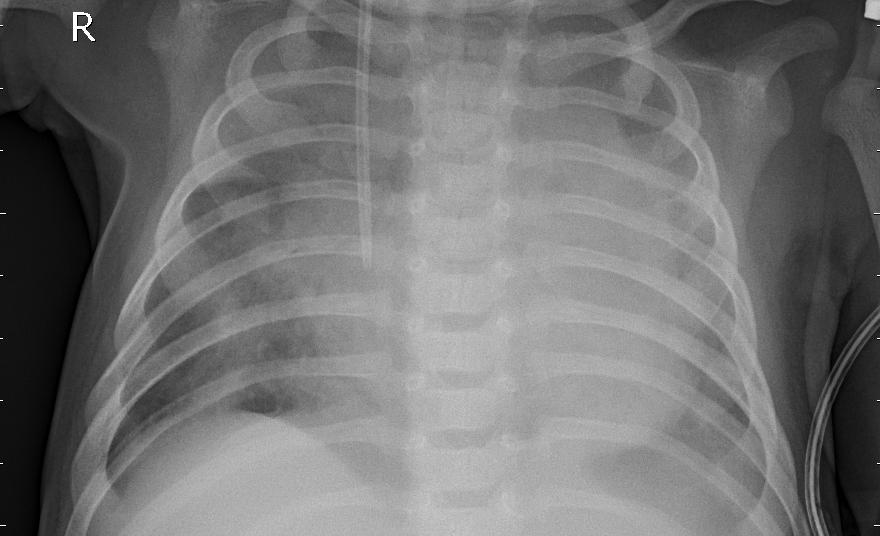

1/1 [==============================] - 0s 35ms/step
Prediction Probabilities: [[2.3650595e-05 9.9944764e-01]]
Predicted Label: 1
The person's x-ray in the image is suffering from pneumonia.


In [75]:
input_image_path = input("Path of the image to be predicted:")

# Read the image in grayscale mode
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if input_image is None:
    print("Error: Unable to load the image.")
else:
    # Display the input image
    cv2_imshow(input_image)

    # Resize, expand dimensions, scale, and reshape
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_resized = np.expand_dims(input_image_resized, axis=-1)
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 1])

    # Make predictions
    input_prediction = model.predict(input_image_reshaped)

    print("Prediction Probabilities:", input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print("Predicted Label:", input_pred_label)

    if input_pred_label == 1:
        print("The person's x-ray in the image is suffering from pneumonia.")
    else:
        print("The person's x-ray in the image is normal, not suffering from pneumonia.")